# Distribuzioni Tags, Commenti

In [1]:
import pymongo
from pymongo import MongoClient

from pandas import DataFrame, read_csv
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

client = MongoClient('mongodb://127.0.0.1:27017')
db = client.sample

cu = db.users.find()
cs = db.shots.find()
cf = db.followers.find()
cl = db.likes.find()
ct = db.teams.find()
cutfs = db.user_team_first_shot.find()
csk = db.skills.find()

### Tags

In [2]:
shots_tags_count = []

with open("/home/simo/UnInfo/Tesi Magistrale/Dataset/features/tags_per_shot.txt", "r") as ins:
    for line in ins:
        tag = line[0:line.rfind('-')-1]
        count = line[line.rfind('-')+2:len(line)-1]
        elem = {'shot': tag, 'n_tags': count}
        shots_tags_count.append(elem)

In [3]:
def tags_distribution(shot_list):
    
    values_found = []
    
    tags_freq = []
    
    for i in range(0,len(shot_list)):
        if shot_list[i]['n_tags'] not in values_found:
            values_found.append(shot_list[i]['n_tags'])
            count = 0
            for j in range(i,len(shot_list)):
                if shot_list[j]['n_tags'] == shot_list[i]['n_tags']:
                    count = count + 1
            
            # elem indica quanti shots hanno un certo numero di tags
            elem = {'tag_quantity': shot_list[i]['n_tags'], 'how_many_shots': count}
            tags_freq.append(elem)
            
    return tags_freq

In [17]:
distrib = tags_distribution(shots_tags_count)

In [18]:
def extract_quantity(json):
    try:
        return int(json['tag_quantity'])
    except KeyError:
        return -1

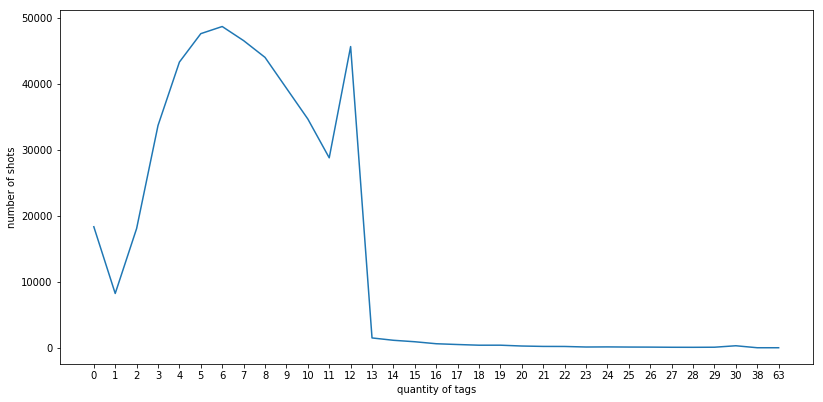

In [19]:
distrib.sort(key=extract_quantity)

x = []
y = []
for i in distrib:
    y.append(i['how_many_shots'])
    x.append(i['tag_quantity'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13.5, 6.5)
plt.xlabel('quantity of tags')
plt.ylabel('number of shots')

plt.plot(x,y)
plt.savefig('tags_distrib.png')

### Comments

In [2]:
shots_comments = []

with open("/home/simo/UnInfo/Tesi Magistrale/Dataset/features/shots_comments.txt", "r") as ins:
    for line in ins:
        shot = line[0:line.rfind('-')-1]
        count = line[line.rfind('-')+2:len(line)-1]
        elem = {'shot': shot, 'comments_count': count}
        shots_comments.append(elem)

In [3]:
def comments_distribution(shot_list):
    
    values_found = []
    
    comments_freq = []
    
    for i in range(0,len(shot_list)):
        if shot_list[i]['comments_count'] not in values_found:
            values_found.append(shot_list[i]['comments_count'])
            count = 0
            for j in range(i,len(shot_list)):
                if shot_list[j]['comments_count'] == shot_list[i]['comments_count']:
                    count = count + 1
            
            # elem indica quanti shots hanno un certo numero di tags
            elem = {'comments_quantity': shot_list[i]['comments_count'], 'how_many_shots': count}
            comments_freq.append(elem)
            
    return comments_freq

In [4]:
distrib = comments_distribution(shots_comments)

In [5]:
def extract_quantity_comments(json):
    try:
        return int(json['comments_quantity'])
    except KeyError:
        return -1

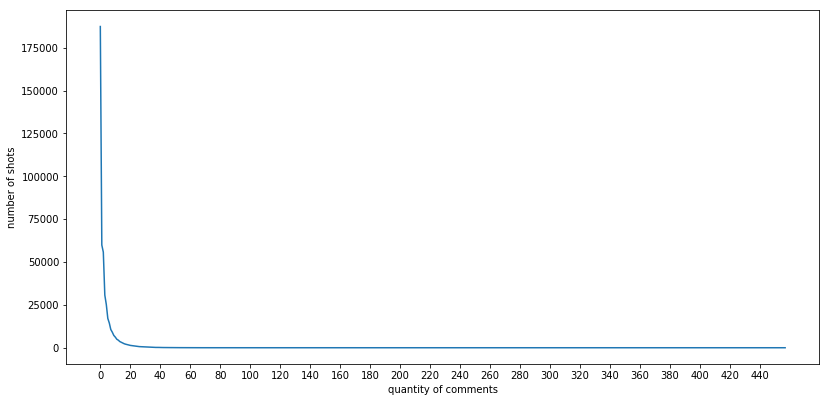

In [9]:
distrib.sort(key=extract_quantity_comments)

x = []
y = []
for i in distrib:
    y.append(int(i['how_many_shots']))
    x.append(int(i['comments_quantity']))

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13.5, 6.5)
plt.xlabel('quantity of comments')
plt.ylabel('number of shots')

plt.xticks(np.arange(min(x), max(x)+1, 20))
#plt.xlim(0,50)

plt.plot(x,y)
plt.savefig('comments_distrib.png')